# Картирование
### Ира Макарова
### декабрь 2022



In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
!conda install -y -c bioconda samtools

In [ ]:
!conda install -c bioconda bedtools

In [ ]:
!conda install -c bioconda bwa

## 1) Проверка входные данные при помощи fastqc

In [ ]:
# Скачиваем fastqc
!conda install -y -c bioconda fastqc

In [ ]:
# И можно multiqc, но не обязательно, так как образцов немного
#!conda install -c bioconda -c conda-forge multiqc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!mkdir index

Mounted at /content/drive


In [ ]:
# Проверяем все данные
!mkdir fastqc
!fastqc drive/MyDrive/NGS/01.rna/*

Failed to process drive/MyDrive/NGS/01.rna/B14.5_fastqc.html
uk.ac.babraham.FastQC.Sequence.SequenceFormatException: ID line didn't start with '@'
	at uk.ac.babraham.FastQC.Sequence.FastQFile.readNext(FastQFile.java:158)
	at uk.ac.babraham.FastQC.Sequence.FastQFile.<init>(FastQFile.java:89)
	at uk.ac.babraham.FastQC.Sequence.SequenceFactory.getSequenceFile(SequenceFactory.java:106)
	at uk.ac.babraham.FastQC.Sequence.SequenceFactory.getSequenceFile(SequenceFactory.java:62)
	at uk.ac.babraham.FastQC.Analysis.OfflineRunner.processFile(OfflineRunner.java:159)
	at uk.ac.babraham.FastQC.Analysis.OfflineRunner.<init>(OfflineRunner.java:121)
	at uk.ac.babraham.FastQC.FastQCApplication.main(FastQCApplication.java:316)
Failed to process drive/MyDrive/NGS/01.rna/B14.5_fastqc.zip
uk.ac.babraham.FastQC.Sequence.SequenceFormatException: ID line didn't start with '@'
	at uk.ac.babraham.FastQC.Sequence.FastQFile.readNext(FastQFile.java:158)
	at uk.ac.babraham.FastQC.Sequence.FastQFile.<init>(FastQFile

In [ ]:
# Смотрим отчеты, все в пределах нормы, один отчет для примера ниже

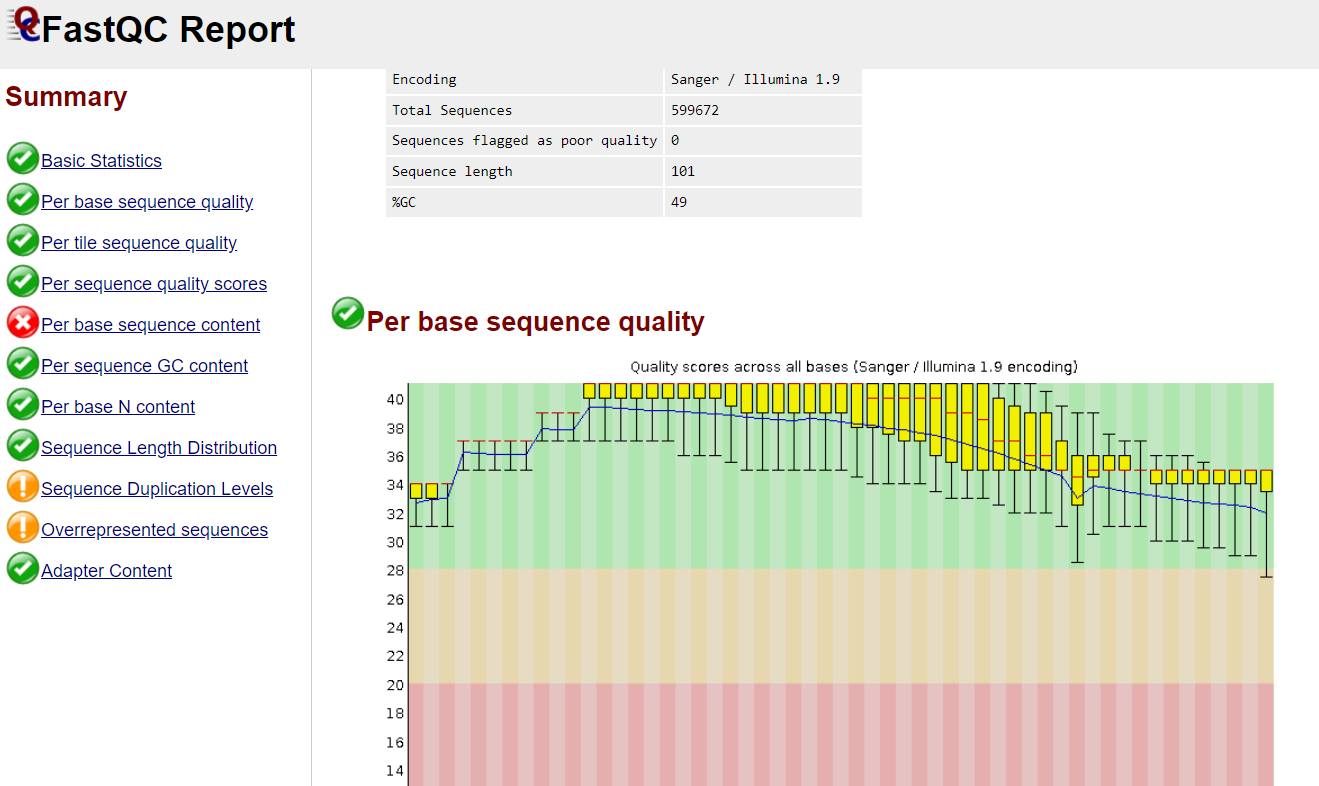

##2) hisat2

In [ ]:
!conda install -y -c bioconda hisat2

In [ ]:
!hisat2_extract_splice_sites.py

## 3) последовательность 19 хромосомы мыши и её аннотацию в формате gtf (ensembl.org→Mouse→Download FASTA/GTF → скачать)

In [ ]:
%cd index

/content/index


In [ ]:
# 19 хромосома
!wget http://ftp.ensembl.org/pub/release-107/fasta/mus_musculus/dna/Mus_musculus.GRCm39.dna.chromosome.19.fa.gz

--2022-12-22 17:38:34--  http://ftp.ensembl.org/pub/release-107/fasta/mus_musculus/dna/Mus_musculus.GRCm39.dna.chromosome.19.fa.gz
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.139
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.139|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17732438 (17M) [application/x-gzip]
Saving to: ‘Mus_musculus.GRCm39.dna.chromosome.19.fa.gz’

Mus_musculus.GRCm39 100%[===================>]  16.91M   629KB/s    in 28s     

2022-12-22 17:39:02 (628 KB/s) - ‘Mus_musculus.GRCm39.dna.chromosome.19.fa.gz’ saved [17732438/17732438]



In [ ]:
# Весь геном
!wget http://ftp.ensembl.org/pub/release-107/gtf/mus_musculus/Mus_musculus.GRCm39.107.chr.gtf.gz

--2022-12-22 17:39:02--  http://ftp.ensembl.org/pub/release-107/gtf/mus_musculus/Mus_musculus.GRCm39.107.chr.gtf.gz
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.139
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.139|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31854002 (30M) [application/x-gzip]
Saving to: ‘Mus_musculus.GRCm39.107.chr.gtf.gz’

Mus_musculus.GRCm39 100%[===================>]  30.38M   625KB/s    in 50s     

2022-12-22 17:39:53 (623 KB/s) - ‘Mus_musculus.GRCm39.107.chr.gtf.gz’ saved [31854002/31854002]



In [ ]:
# Разархивируем
!gunzip ./*
!ls -lh

total 891M
-rw-r--r-- 1 root root 831M Jun  4  2022 Mus_musculus.GRCm39.107.chr.gtf
-rw-r--r-- 1 root root  60M Jun  4  2022 Mus_musculus.GRCm39.dna.chromosome.19.fa


In [ ]:
!head Mus_musculus.GRCm39.107.chr.gtf

#!genome-build GRCm39
#!genome-version GRCm39
#!genome-date 2020-06
#!genome-build-accession GCA_000001635.9
#!genebuild-last-updated 2022-04
1	havana	gene	150956201	150958296	.	+	.	gene_id "ENSMUSG00000102628"; gene_version "2"; gene_name "Gm37671"; gene_source "havana"; gene_biotype "TEC";
1	havana	transcript	150956201	150958296	.	+	.	gene_id "ENSMUSG00000102628"; gene_version "2"; transcript_id "ENSMUST00000193198"; transcript_version "2"; gene_name "Gm37671"; gene_source "havana"; gene_biotype "TEC"; transcript_name "Gm37671-201"; transcript_source "havana"; transcript_biotype "TEC"; tag "basic"; transcript_support_level "NA (assigned to previous version 1)";
1	havana	exon	150956201	150958296	.	+	.	gene_id "ENSMUSG00000102628"; gene_version "2"; transcript_id "ENSMUST00000193198"; transcript_version "2"; exon_number "1"; gene_name "Gm37671"; gene_source "havana"; gene_biotype "TEC"; transcript_name "Gm37671-201"; transcript_source "havana"; transcript_biotype "TEC"; exon_id "ENSMUS

## 4) только 19ая хромосома

In [ ]:
!grep -P '^19\t' Mus_musculus.GRCm39.107.chr.gtf > Mus_musculus.GRCm39.107.chr19.gtf

## 5) индекс по последовательности 19ой хромосомы (без координат сайтов)

In [ ]:
# Без координат сайтов
!hisat2-build Mus_musculus.GRCm39.dna.chromosome.19.fa Mus_musculus.GRCm39.dna.chromosome.19.no_ss

Settings:
  Output files: "Mus_musculus.GRCm39.dna.chromosome.19.no_ss.*.ht2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Local offset rate: 3 (one in 8)
  Local fTable chars: 6
  Local sequence length: 57344
  Local sequence overlap between two consecutive indexes: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  Mus_musculus.GRCm39.dna.chromosome.19.fa
Reading reference sizes
  Time reading reference sizes: 00:00:01
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:00
  Time to read SNPs and splice sites: 00:00:00
Using parameters --bmax 10916251 --dcv 1024
  Doing ahead-of-time memory usage test
  Passed!  Constructing with these parameters: --bm

## 6) Картирование fq файлов на 19ую хромосому, не допуская обрезания ридов и сообщив hisat2 координаты сайтов сплайсинга

In [ ]:
# Достаем координаты сайтов сплайсинга и экзонов
!hisat2_extract_splice_sites.py Mus_musculus.GRCm39.107.chr19.gtf > Mus_musculus.GRCm39.107.chr19.ss
!hisat2_extract_exons.py Mus_musculus.GRCm39.107.chr19.gtf > Mus_musculus.GRCm39.107.chr19.exons
!ls -lh

total 1007M
-rw-r--r-- 1 root root 188K Dec 22 17:41 Mus_musculus.GRCm39.107.chr19.exons
-rw-r--r-- 1 root root  27M Dec 22 17:40 Mus_musculus.GRCm39.107.chr19.gtf
-rw-r--r-- 1 root root 206K Dec 22 17:41 Mus_musculus.GRCm39.107.chr19.ss
-rw-r--r-- 1 root root 831M Jun  4  2022 Mus_musculus.GRCm39.107.chr.gtf
-rw-r--r-- 1 root root  60M Jun  4  2022 Mus_musculus.GRCm39.dna.chromosome.19.fa
-rw-r--r-- 1 root root  23M Dec 22 17:40 Mus_musculus.GRCm39.dna.chromosome.19.no_ss.1.ht2
-rw-r--r-- 1 root root  14M Dec 22 17:40 Mus_musculus.GRCm39.dna.chromosome.19.no_ss.2.ht2
-rw-r--r-- 1 root root   35 Dec 22 17:40 Mus_musculus.GRCm39.dna.chromosome.19.no_ss.3.ht2
-rw-r--r-- 1 root root  14M Dec 22 17:40 Mus_musculus.GRCm39.dna.chromosome.19.no_ss.4.ht2
-rw-r--r-- 1 root root  25M Dec 22 17:41 Mus_musculus.GRCm39.dna.chromosome.19.no_ss.5.ht2
-rw-r--r-- 1 root root  15M Dec 22 17:41 Mus_musculus.GRCm39.dna.chromosome.19.no_ss.6.ht2
-rw-r--r-- 1 root root   12 Dec 22 17:40 Mus_musculus.GRCm39.

In [ ]:
# Экзоны
!head Mus_musculus.GRCm39.107.chr19.exons

19	3103070	3103277	-
19	3109879	3109990	-
19	3115710	3118148	-
19	3119366	3119439	-
19	3122687	3122952	-
19	3125713	3125884	-
19	3184644	3184958	+
19	3186983	3187089	-
19	3192759	3193064	+
19	3195867	3196264	-


In [ ]:
# Сайты сплайсинга
!head Mus_musculus.GRCm39.107.chr19.ss

19	3103277	3109879	-
19	3109990	3119366	-
19	3118148	3119366	-
19	3119439	3122687	-
19	3122952	3125713	-
19	3122952	3246944	-
19	3125884	3246944	-
19	3196264	3197632	-
19	3196264	3203930	-
19	3196264	3209940	-


In [ ]:
# Индексируем с координатами сайтов (либо можно было подать их hisat2 с помощью known splice sites, но уже сделала так)
#!hisat2-build --ss Mus_musculus.GRCm39.107.chr19.ss --exon Mus_musculus.GRCm39.107.chr19.exons Mus_musculus.GRCm39.dna.chromosome.19.fa Mus_musculus.GRCm39.dna.chromosome.19

In [ ]:
%cd ../
!mkdir bams
%cd bams

/content
/content/bams


In [ ]:
my_sample = 'C17.5'
index = '/content/index/Mus_musculus.GRCm39.dna.chromosome.19.no_ss'
path = '/content/drive/MyDrive/NGS/01.rna'
ss = '/content/index/Mus_musculus.GRCm39.107.chr19.ss'

In [ ]:
!echo $path

/content/drive/MyDrive/NGS/01.rna


In [ ]:
# Картируем все
my_samples = ['B14.5', 'B15.5', 'B17.5', 'B20', 'B34',
              'C14.5', 'C15.5', 'C17.5', 'C20', 'C34']
for sample in my_samples:
  !hisat2 --summary-file $sample\.log --no-softclip --no-unal --known-splicesite-infile $ss -x $index -U $path/$sample\.fq | samtools view -Sb - > $sample\.bam

# % картирования почти для всех образцов более 90, с ними все в порядке. Есть 3 обрзазца с более низким %: B15.5, B17.5, C15.5 (~88%).
# Похоже, можно было бы использовать softclip, но в задания явно написано "без обрезания"

599672 reads; of these:
  599672 (100.00%) were unpaired; of these:
    46932 (7.83%) aligned 0 times
    540477 (90.13%) aligned exactly 1 time
    12263 (2.04%) aligned >1 times
92.17% overall alignment rate
599345 reads; of these:
  599345 (100.00%) were unpaired; of these:
    70738 (11.80%) aligned 0 times
    517132 (86.28%) aligned exactly 1 time
    11475 (1.91%) aligned >1 times
88.20% overall alignment rate
600006 reads; of these:
  600006 (100.00%) were unpaired; of these:
    74975 (12.50%) aligned 0 times
    515423 (85.90%) aligned exactly 1 time
    9608 (1.60%) aligned >1 times
87.50% overall alignment rate
599777 reads; of these:
  599777 (100.00%) were unpaired; of these:
    51084 (8.52%) aligned 0 times
    538301 (89.75%) aligned exactly 1 time
    10392 (1.73%) aligned >1 times
91.48% overall alignment rate
599683 reads; of these:
  599683 (100.00%) were unpaired; of these:
    51757 (8.63%) aligned 0 times
    539543 (89.97%) aligned exactly 1 time
    8383 (1.40

In [ ]:
!ls -lh

total 523M
-rw-r--r-- 1 root root 51M Dec 22 17:43 B14.5.bam
-rw-r--r-- 1 root root 210 Dec 22 17:43 B14.5.log
-rw-r--r-- 1 root root 53M Dec 22 17:43 B15.5.bam
-rw-r--r-- 1 root root 211 Dec 22 17:43 B15.5.log
-rw-r--r-- 1 root root 53M Dec 22 17:44 B17.5.bam
-rw-r--r-- 1 root root 210 Dec 22 17:44 B17.5.log
-rw-r--r-- 1 root root 53M Dec 22 17:44 B20.bam
-rw-r--r-- 1 root root 210 Dec 22 17:44 B20.log
-rw-r--r-- 1 root root 52M Dec 22 17:45 B34.bam
-rw-r--r-- 1 root root 209 Dec 22 17:45 B34.log
-rw-r--r-- 1 root root 56M Dec 22 17:45 C14.5.bam
-rw-r--r-- 1 root root 210 Dec 22 17:45 C14.5.log
-rw-r--r-- 1 root root 53M Dec 22 17:46 C15.5.bam
-rw-r--r-- 1 root root 211 Dec 22 17:46 C15.5.log
-rw-r--r-- 1 root root 52M Dec 22 17:46 C17.5.bam
-rw-r--r-- 1 root root 210 Dec 22 17:46 C17.5.log
-rw-r--r-- 1 root root 52M Dec 22 17:47 C20.bam
-rw-r--r-- 1 root root 209 Dec 22 17:47 C20.log
-rw-r--r-- 1 root root 54M Dec 22 17:47 C34.bam
-rw-r--r-- 1 root root 209 Dec 22 17:47 C34.log


## 7) один образец

In [ ]:
my_sample

'C17.5'

In [ ]:
# Делаем индексацию для использования samtools
!samtools sort -o $my_sample\.s.bam $my_sample\.bam
!mv $my_sample\.s.bam $my_sample\.bam
!samtools index $my_sample\.bam
#!samtools sort -o $my_sample\.s.bam $my_sample\.bam

In [ ]:
!samtools view $my_sample\.bam 19:3324440-3329850 |wc -l #Сколько ридов картируется в регион 19:3324440-3329850 в этом образце

['42']

In [ ]:
!samtools view $my_sample\.bam 19:3324440-3329850 -bq 1 | wc -l #з них картируются только в одно место генома

20


In [ ]:
# Количество ридов, которые картировались без замен
!samtools view $my_sample\.bam 19:3324440-3329850 | grep "NM:i:0" | wc -l


33


In [ ]:
# С заменами
for j in range(1, 10):
  q = !samtools view $my_sample\.bam 19:3324440-3329850 | grep "NM:i:$j" | wc -l
  print(j, 'замен: ', q)
# хватит интервала до 10, так как итог = 44

1 замен:  ['5']
2 замен:  ['3']
3 замен:  ['0']
4 замен:  ['0']
5 замен:  ['0']
6 замен:  ['0']
7 замен:  ['0']
8 замен:  ['0']
9 замен:  ['1']


##8) Сколько ридов картировалось на экзон-экзонные границы? Перечислите координаты всех интронов в данном интервале подтверждённых хотя бы одним ридом в формате: chr:from-to coverage

In [ ]:
# На экзон-экзонные границы
!samtools view $my_sample\.bam 19:3324440-3329850 |  awk '($6 ~ /N/)' | wc -l

['28']

In [ ]:
# Координаты интронов, подтвержденные хотя бы 1 ридом
%cd /content
!bedtools coverage -counts -abam bams/$my_sample\.bam -b index/Mus_musculus.GRCm39.107.chr19.ss | grep -v "NH:i:0" > index/coverage.txt
!head index/coverage.txt

/content
19	3051945	3052046	HISEQ:143:C3HD9ACXX:1:1111:16785:15285	60	-	3051945	3052046	0,0,0	1	101,	0,	0
19	3079513	3079614	HISEQ:143:C3HD9ACXX:1:1313:4086:55328	60	+	3079513	3079614	0,0,0	1	101,	0,	0
19	3081030	3081131	HISEQ:143:C3HD9ACXX:1:1306:21228:75283	1	+	3081030	3081131	0,0,0	1	101,	0,	0
19	3081345	3081446	HISEQ:143:C3HD9ACXX:1:2308:10282:21952	1	+	3081345	3081446	0,0,0	1	101,	0,	0
19	3083271	3083372	HISEQ:143:C3HD9ACXX:1:2108:12122:33544	60	-	3083271	3083372	0,0,0	1	101,	0,	0
19	3083278	3083379	HISEQ:143:C3HD9ACXX:1:1115:20825:89715	1	-	3083278	3083379	0,0,0	1	101,	0,	0
19	3083306	3083407	HISEQ:143:C3HD9ACXX:1:2309:1373:72196	1	-	3083306	3083407	0,0,0	1	101,	0,	0
19	3083324	3083425	HISEQ:143:C3HD9ACXX:1:2309:13623:41500	1	-	3083324	3083425	0,0,0	1	101,	0,	0
19	3083363	3083464	HISEQ:143:C3HD9ACXX:1:2116:4368:16272	1	+	3083363	3083464	0,0,0	1	101,	0,	0
19	3083366	3083467	HISEQ:143:C3HD9ACXX:1:2110:19271:83885	1	+	3083366	3083467	0,0,0	1	101,	0,	0


In [ ]:
# Координаты интронов, подтвержденные хотя бы 1 ридом, попадающие в нужный интервал
list = !cat index/coverage.txt | awk '$2>=3324440 && $3<=3329850

In [ ]:
for line in list:
  line = line.split('\t')
  print(line[0], ':', line[1], '-', line[2], ' ', line[4], sep='')

19:3324508-3326808 60
19:3324520-3326820 60
19:3324523-3326823 60
19:3324528-3326828 60
19:3324532-3326832 60
19:3324548-3326848 60
19:3326801-3326902 60
19:3326824-3329538 60
19:3326836-3329550 60
19:3326864-3329578 60
19:3326887-3329601 60
19:3326887-3329601 60
19:3326888-3329602 60
19:3326894-3329608 60
19:3326897-3329611 60
19:3326897-3329611 60
19:3326913-3329627 60
19:3326915-3329629 60
19:3326962-3327063 60
19:3327775-3327876 60
19:3327776-3327877 60
19:3329149-3329250 60
19:3329538-3329815 60
19:3329569-3329846 60
19:3329722-3329823 60
19:3329728-3329829 60
19:3329729-3329830 60
